# <u><h3>APPENDIX</u>

# Making the necessary library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Dataset Preprocessing

In [61]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [67]:
df['Heart_ stroke'].unique()

TypeError: count() takes at least 1 argument (0 given)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [4]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [5]:
df.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [6]:
#Fill null values

df['glucose'] = df.glucose.fillna(df.glucose.median())
df['cigsPerDay'] = df.cigsPerDay.fillna(df.cigsPerDay.median())
df['BMI'] = df.BMI.fillna(df.BMI.median())
df['totChol'] = df.totChol.fillna(df.totChol.median())
df['heartRate'] = df.heartRate.fillna(df.heartRate.median())

In [7]:
df['education'] = df.education.fillna(df.education.mode().iloc[0])
df['BPMeds'] = df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

In [8]:
df.isna().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [9]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['education'] = le.fit_transform(df['education'])
df['prevalentStroke'] = le.fit_transform(df['prevalentStroke'])
df['Heart_ stroke'] = le.fit_transform(df['Heart_ stroke'])

# Exploratory Data Analysis (EDA)

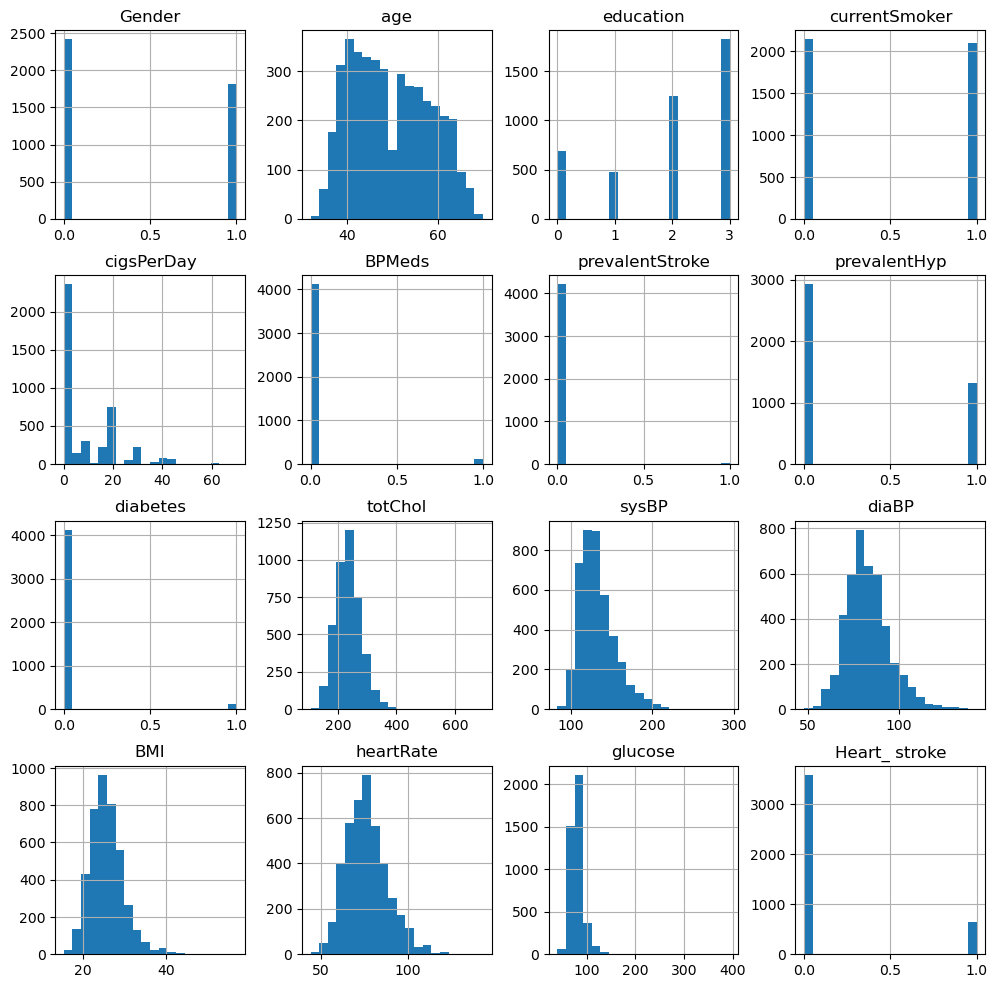

In [10]:
df.hist(bins=20, figsize=(12,12))
plt.show()

<AxesSubplot:>

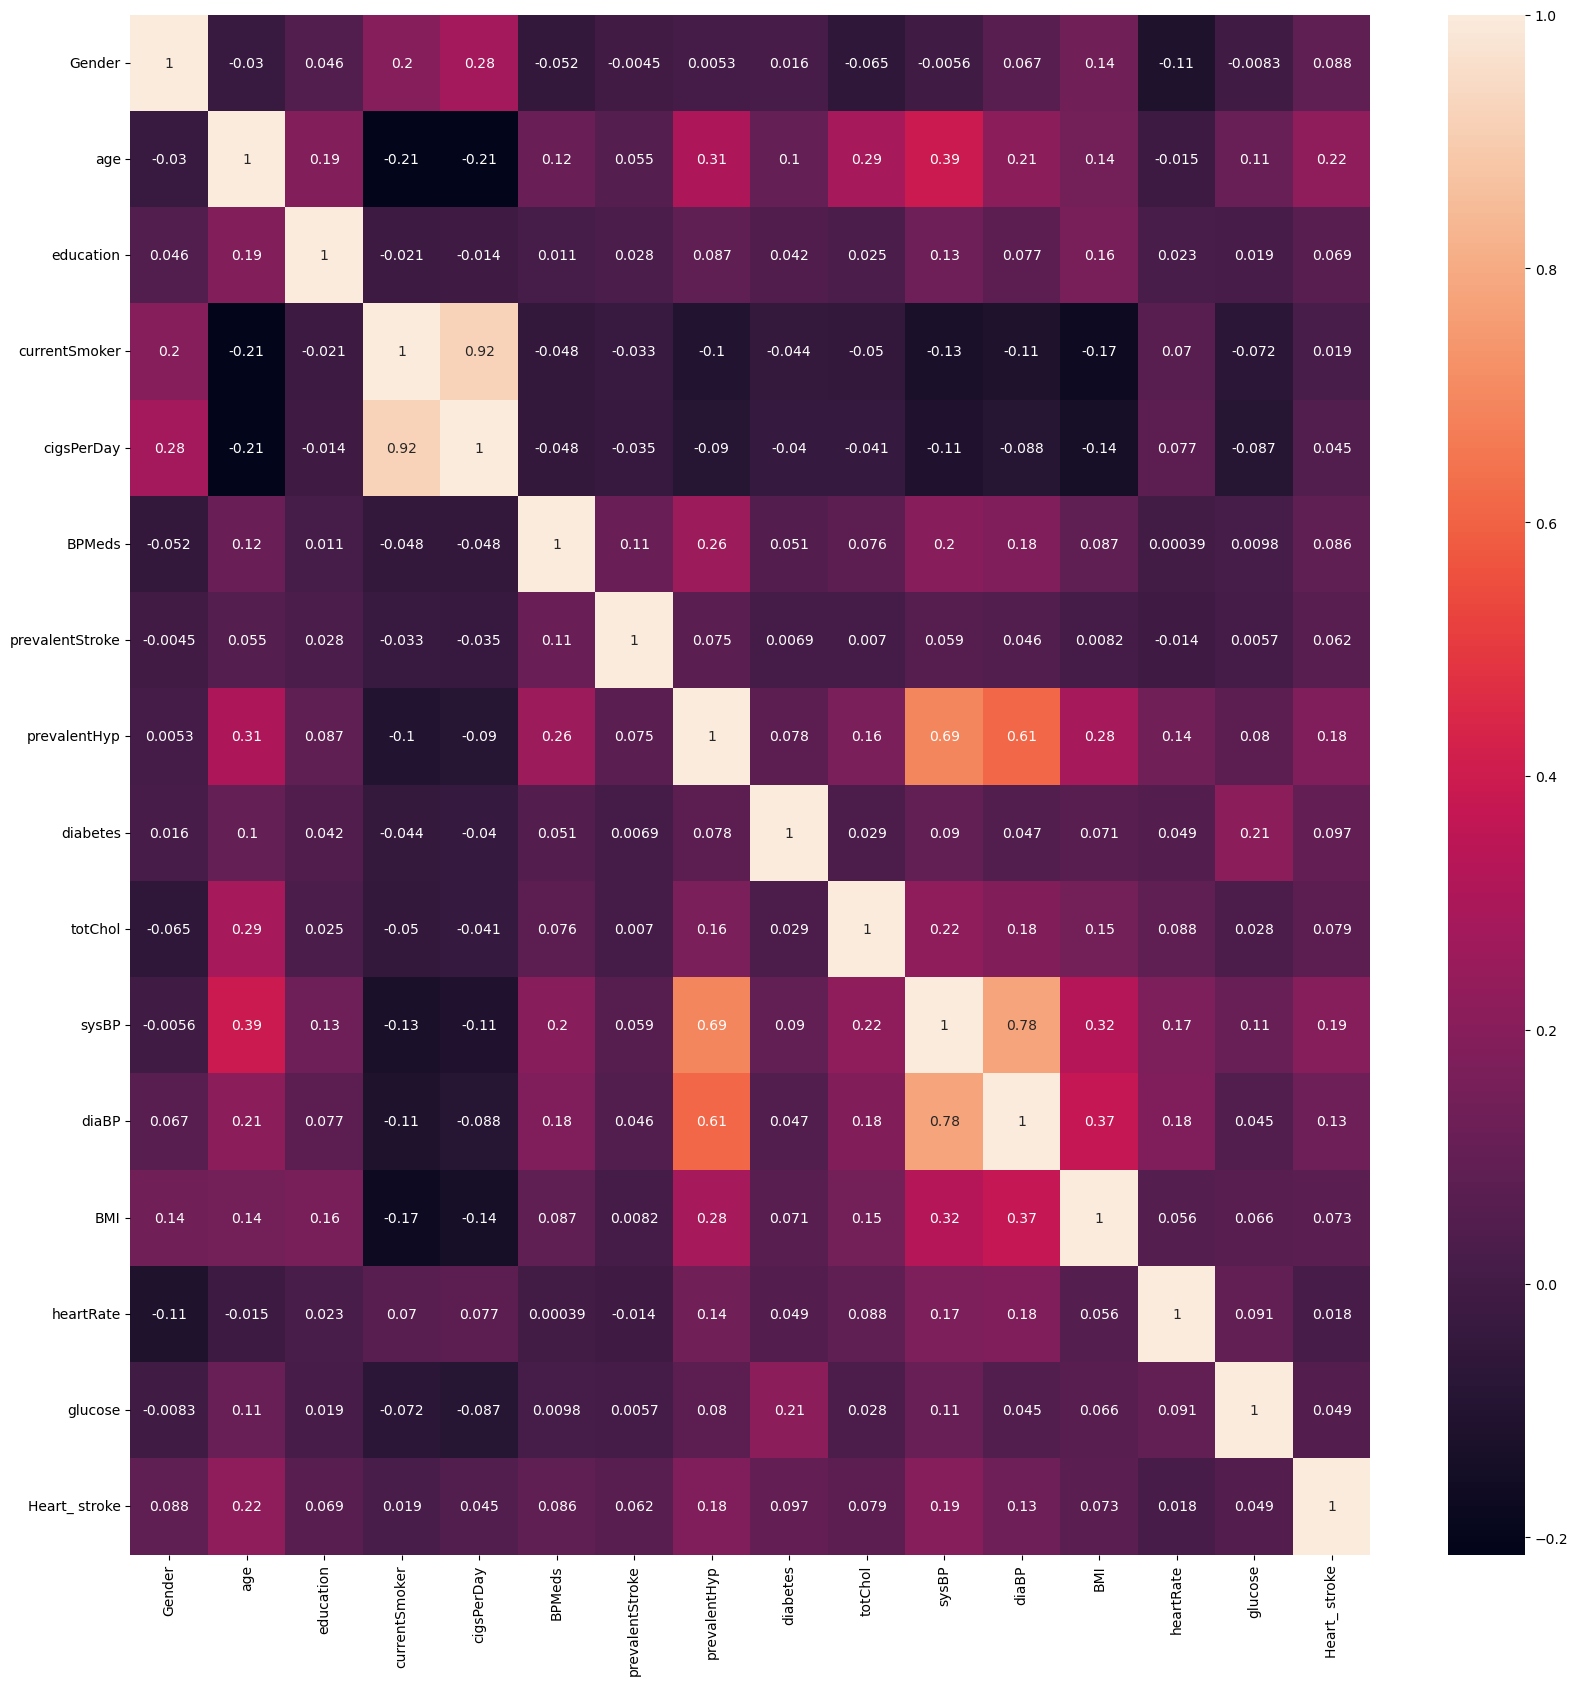

In [11]:
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(method = 'spearman'), annot = True)

# Dataset Split into Training and Testing

In [10]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
corr_matrix = df.corr()
corr_matrix['Heart_ stroke'].sort_values(ascending = False)

Heart_ stroke      1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.121277
diabetes           0.097317
Gender             0.088428
BPMeds             0.086417
totChol            0.081566
BMI                0.074217
prevalentStroke    0.061810
cigsPerDay         0.058859
education          0.058036
heartRate          0.022857
currentSmoker      0.019456
Name: Heart_ stroke, dtype: float64

In [12]:
X = df.drop(['Heart_ stroke', 'currentSmoker', 'heartRate', 'education'
            ,'cigsPerDay', 'prevalentStroke'],axis=1)
y = df['Heart_ stroke']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .3, random_state = 68)

In [15]:
pca = PCA(.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(4238, 3)

In [49]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size=.3, random_state = 5)

In [17]:
print("Without PCA, X_train: ", X_train.shape)
print("With PCA, X_train: ", X_train_pca.shape)

Without PCA, X_train:  (2966, 10)
With PCA, X_train:  (2966, 3)


# Logistic Regression

In [35]:
LogReg = LogisticRegression(solver='liblinear')
LogReg_pca = LogisticRegression(solver = 'liblinear')

In [36]:
LogReg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [50]:
LogReg_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(solver='liblinear')

In [37]:
accLogReg = LogReg.score(X_test, y_test)
print(accLogReg)

0.860062893081761


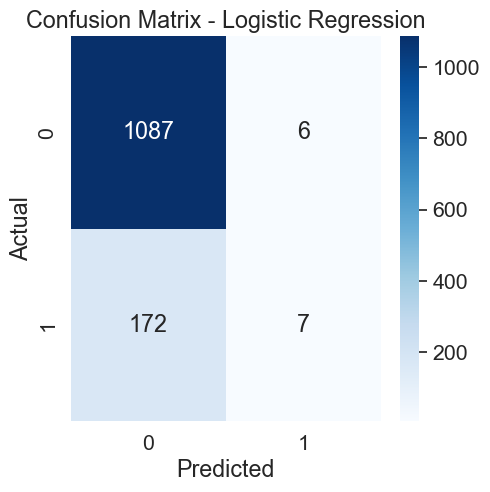

In [59]:
y_pred = LogReg.predict(X_test)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [51]:
accLogRegwPCA = LogReg_pca.score(X_test_pca, y_test_pca)
print(accLogRegwPCA)

0.8372641509433962


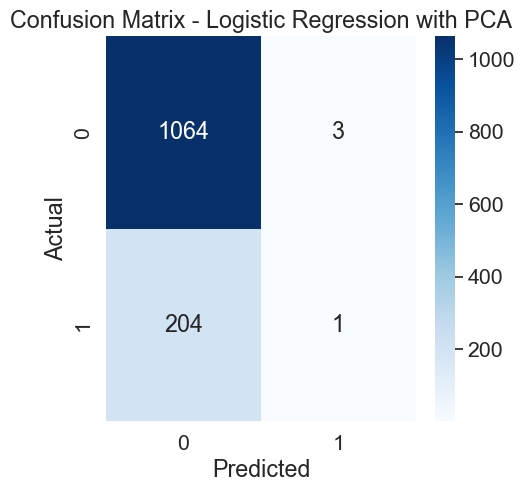

In [58]:
y_pred_pca = LogReg_pca.predict(X_test_pca)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with PCA')
plt.show()

# K Nearest Neighbor 

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_pca = KNeighborsClassifier(n_neighbors = 5)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [41]:
accKNN = knn.score(X_test, y_test)
print(accKNN)

0.8466981132075472


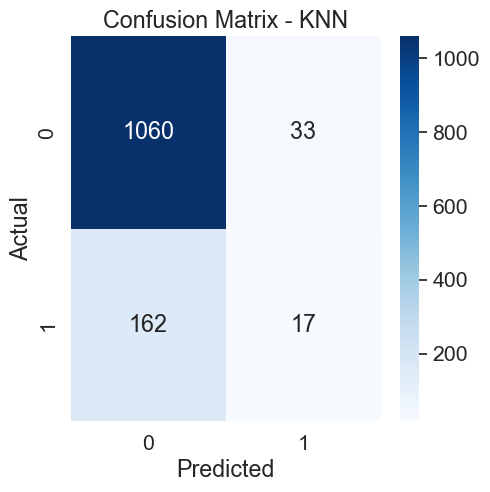

In [31]:
y_pred = knn.predict(X_test)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [53]:
accKNNwPCA = knn_pca.score(X_test_pca, y_test_pca)
print(accKNNwPCA)

0.8231132075471698


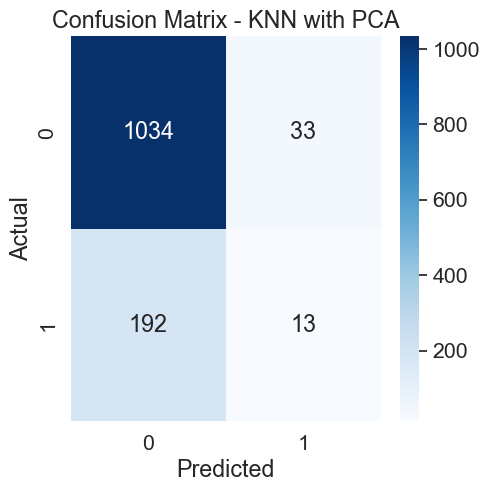

In [33]:
y_pred_pca = knn_pca.predict(X_test_pca)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN with PCA')
plt.show()

# Random Forest

In [42]:
RF = RandomForestClassifier(n_estimators=100)
RF_pca = RandomForestClassifier(n_estimators=100)

In [46]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
RF_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier()

In [47]:
accRF = RF.score(X_test, y_test)
print(accRF)

0.8632075471698113


In [55]:
accRFwPCA = RF_pca.score(X_test_pca, y_test_pca)
print(accRFwPCA)

0.845125786163522


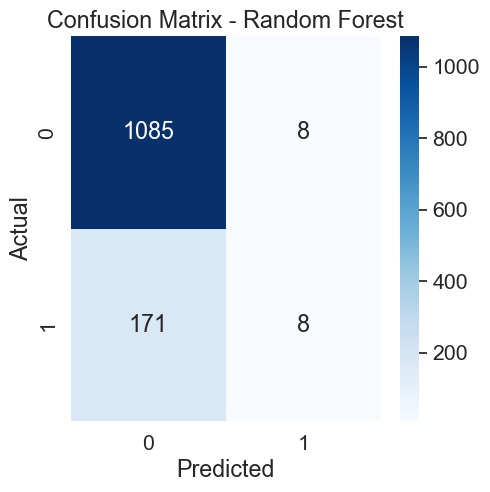

In [39]:
y_pred = RF.predict(X_test)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

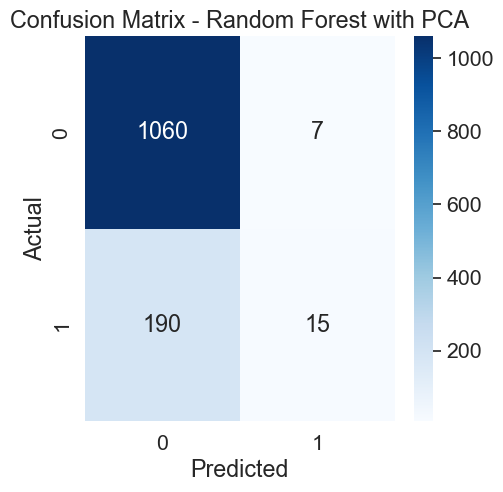

In [41]:
y_pred_pca = RF_pca.predict(X_test_pca)

plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test_pca, y_pred_pca), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with PCA')
plt.show()

# Result Visualization

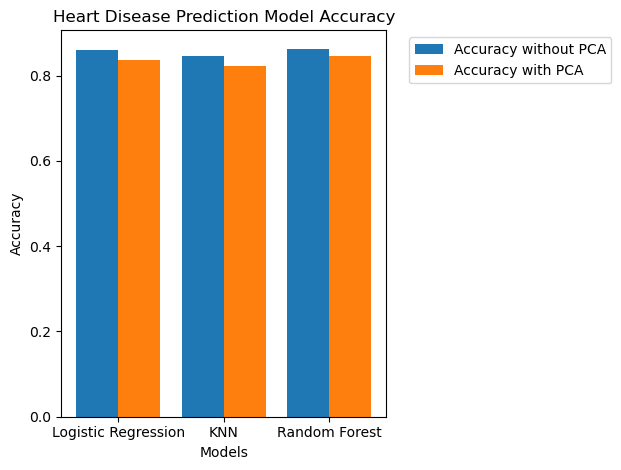

In [56]:
models = ['Logistic Regression','KNN','Random Forest']
acc = [accLogReg, accKNN, accRF]
accwPCA = [accLogRegwPCA, accKNNwPCA, accRFwPCA]

X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, acc, 0.4, label = 'Accuracy without PCA')
plt.bar(X_axis + 0.2, accwPCA, 0.4, label = 'Accuracy with PCA')

plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Heart Disease Prediction Model Accuracy")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()


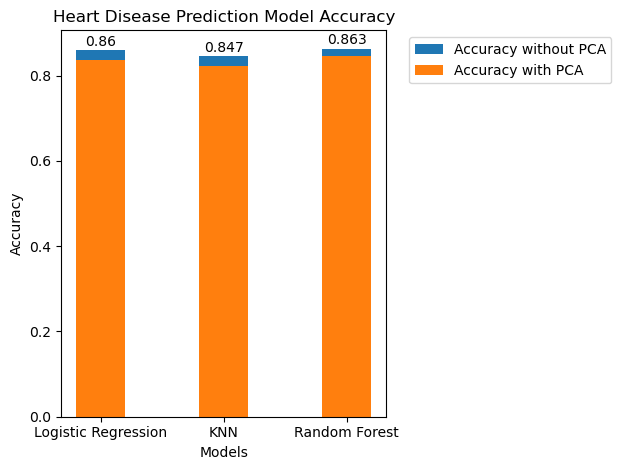

In [57]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.01, round(y[i],3), ha='center')

models = ['Logistic Regression','KNN','Random Forest']
acc = [accLogReg, accKNN, accRF]
accwPCA = [accLogRegwPCA, accKNNwPCA, accRFwPCA]

X_axis = np.arange(len(models))

x=models
y = acc
plt.bar(X_axis, acc, 0.4, label = 'Accuracy without PCA')
plt.bar(X_axis, accwPCA, 0.4, label = 'Accuracy with PCA')

plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Heart Disease Prediction Model Accuracy")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
addlabels(x,y)
plt.show()

